#Data Exploration
##Dataset Information

##Importing modules

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve


In [2]:
df = pd.read_csv(r"/content/creditcard_2023.csv")

In [3]:
df

id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.519014 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794   
1       0.406466 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469   
2       0.743511 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045   
3       0.518269 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048   
4       0.658849 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666   
...          ...       ...       ...  ...       ...       ...       ...   
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.165959  0.126280 -0.434824 -0.081230 -0.151045  17982.10      0  
1      -0.577395  0.190090  0.296503 -0.248052 -0.064512   6531.37      0  
2      -1.154666 -0.605564 -0.312895 -0.300258 -0.244718   2513.54      0  
3      -1.893131  1.003963 -0.515950 -0.165316  0.048424   5384.44      0  
4       0.312561 -0.414116  1.071126  0.023712  0.419117  14278.97      0  
...          ...       ...       ...       ...       ...       ...    ...  
568625 -0.900861  0.560661 -0.006018  3.308968  0.081564   4394.16      1  
568626 -0.846452 -0.153443  1.961398 -1.528642  1.704306   4653.40      1  
568627 -0.448909  0.540073 -0.755836 -0.487540 -0.268741  23572.85      1  
568628 -0.554643 -0.099669 -1.434931 -0.159269 -0.076251  10160.83      1  
568629  0.931030 -0.349423 -1.090974 -1.575113  0.722936  21493.92      1  

[568630 rows x 31 columns]

###The only known variables to us are the id, Amount and Class variables/features. All the other features have been anonymized by the dataset provider for security reasons.

In [4]:
df.shape

(568630, 31)

In [5]:
print("Class 0: ",((df['Class'] == 1).sum()/len(df))*100, "%")
print("Class 1: ",((df['Class'] == 0).sum()/len(df))*100, "%")

Class 0:  50.0 %
Class 1:  50.0 %


####We can see that the classes 0 and 1 are equal in the dataset implying no imbalance in the dataset, due to which the SMOTE Technique will not used with this dataset.

In [6]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#Visualizing the data - building a scatter plot

<ipython-input-7-be8c4fa49112>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Frequency')

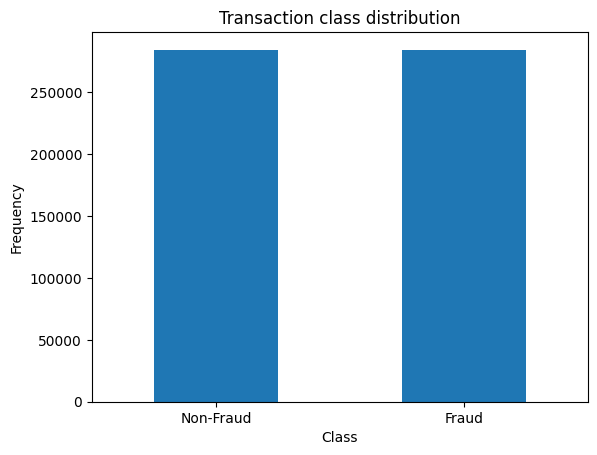

In [7]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
LABELS = ['Non-Fraud', 'Fraud']
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

#Distribution Visualization

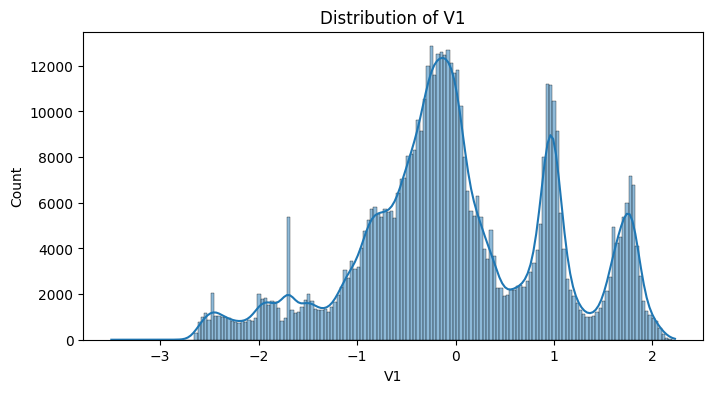

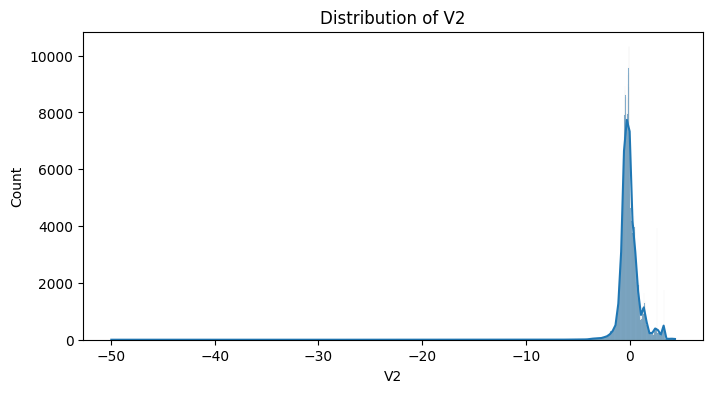

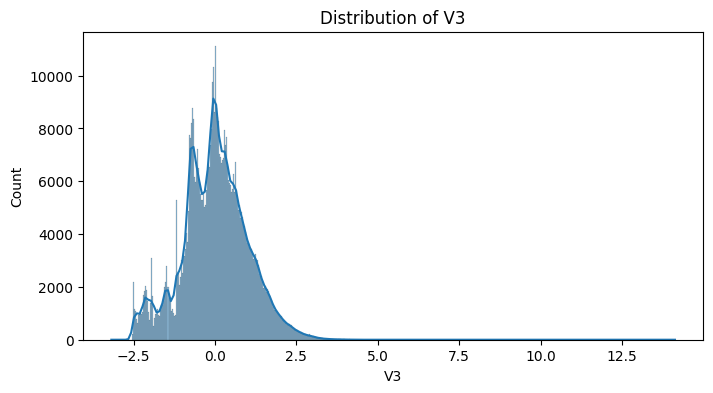

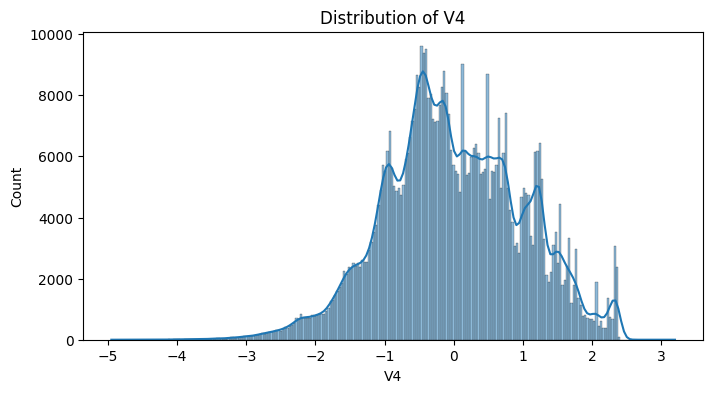

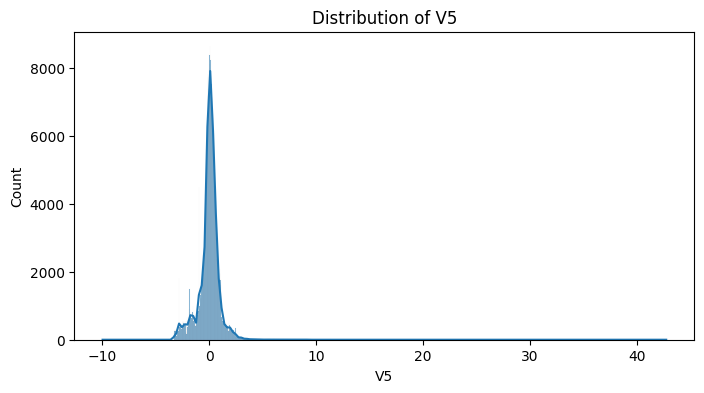

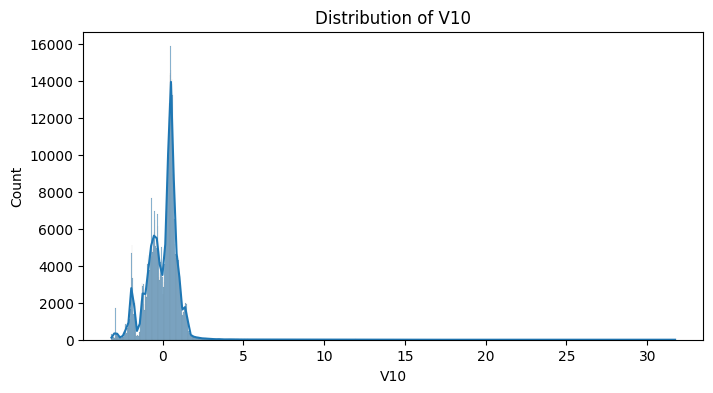

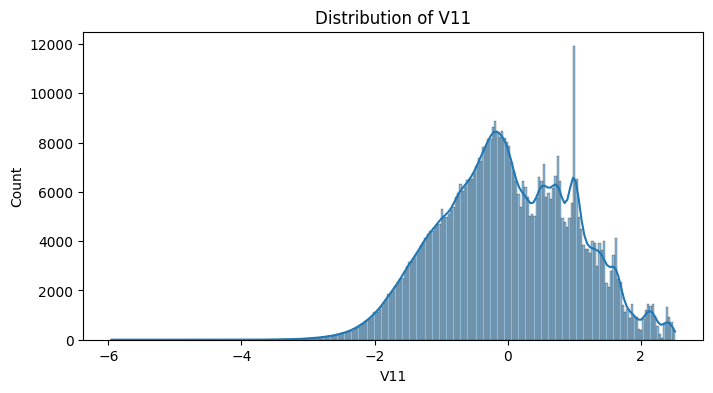

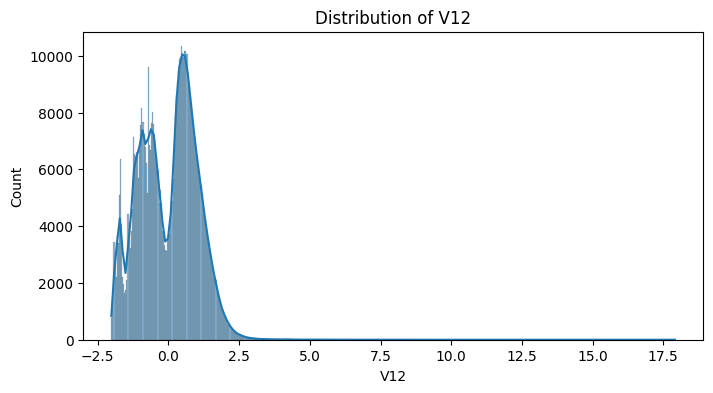

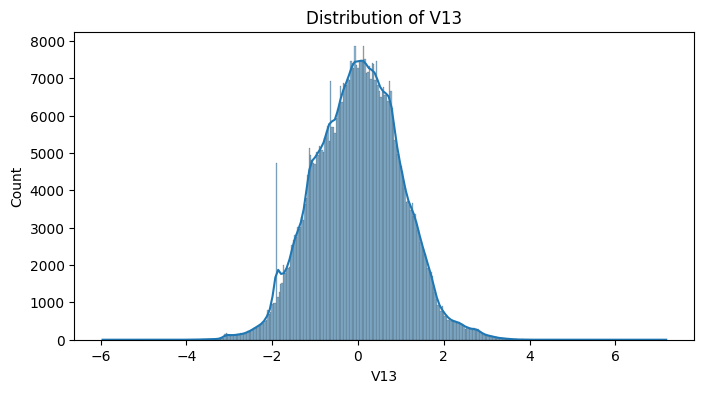

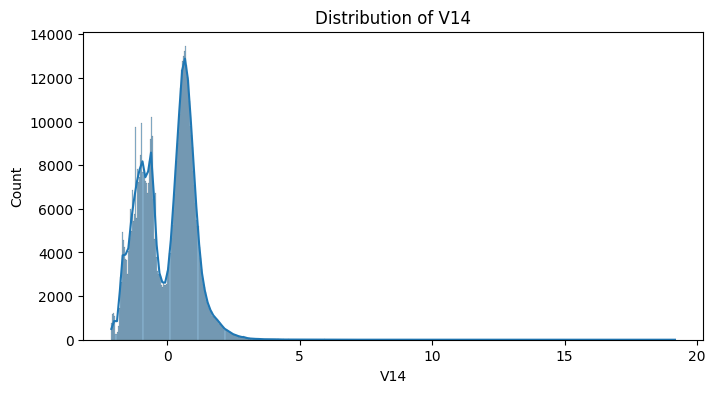

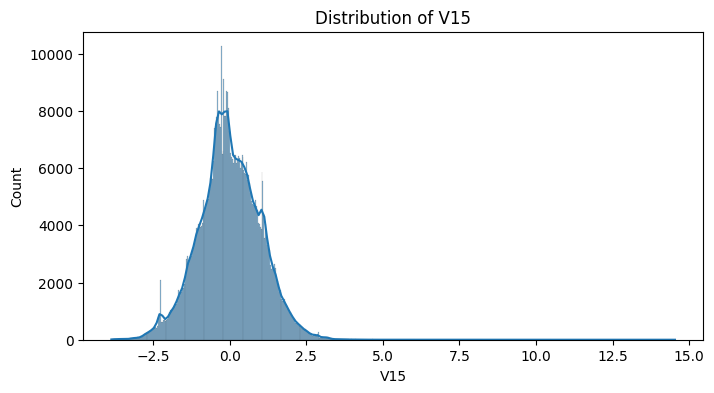

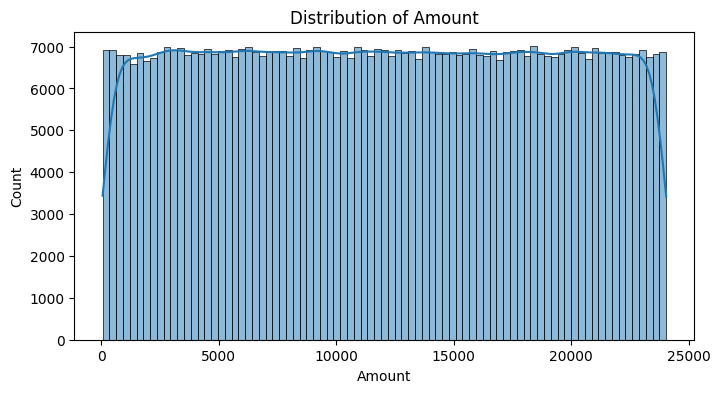

In [9]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'Amount' ]

# Plot distribution of each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



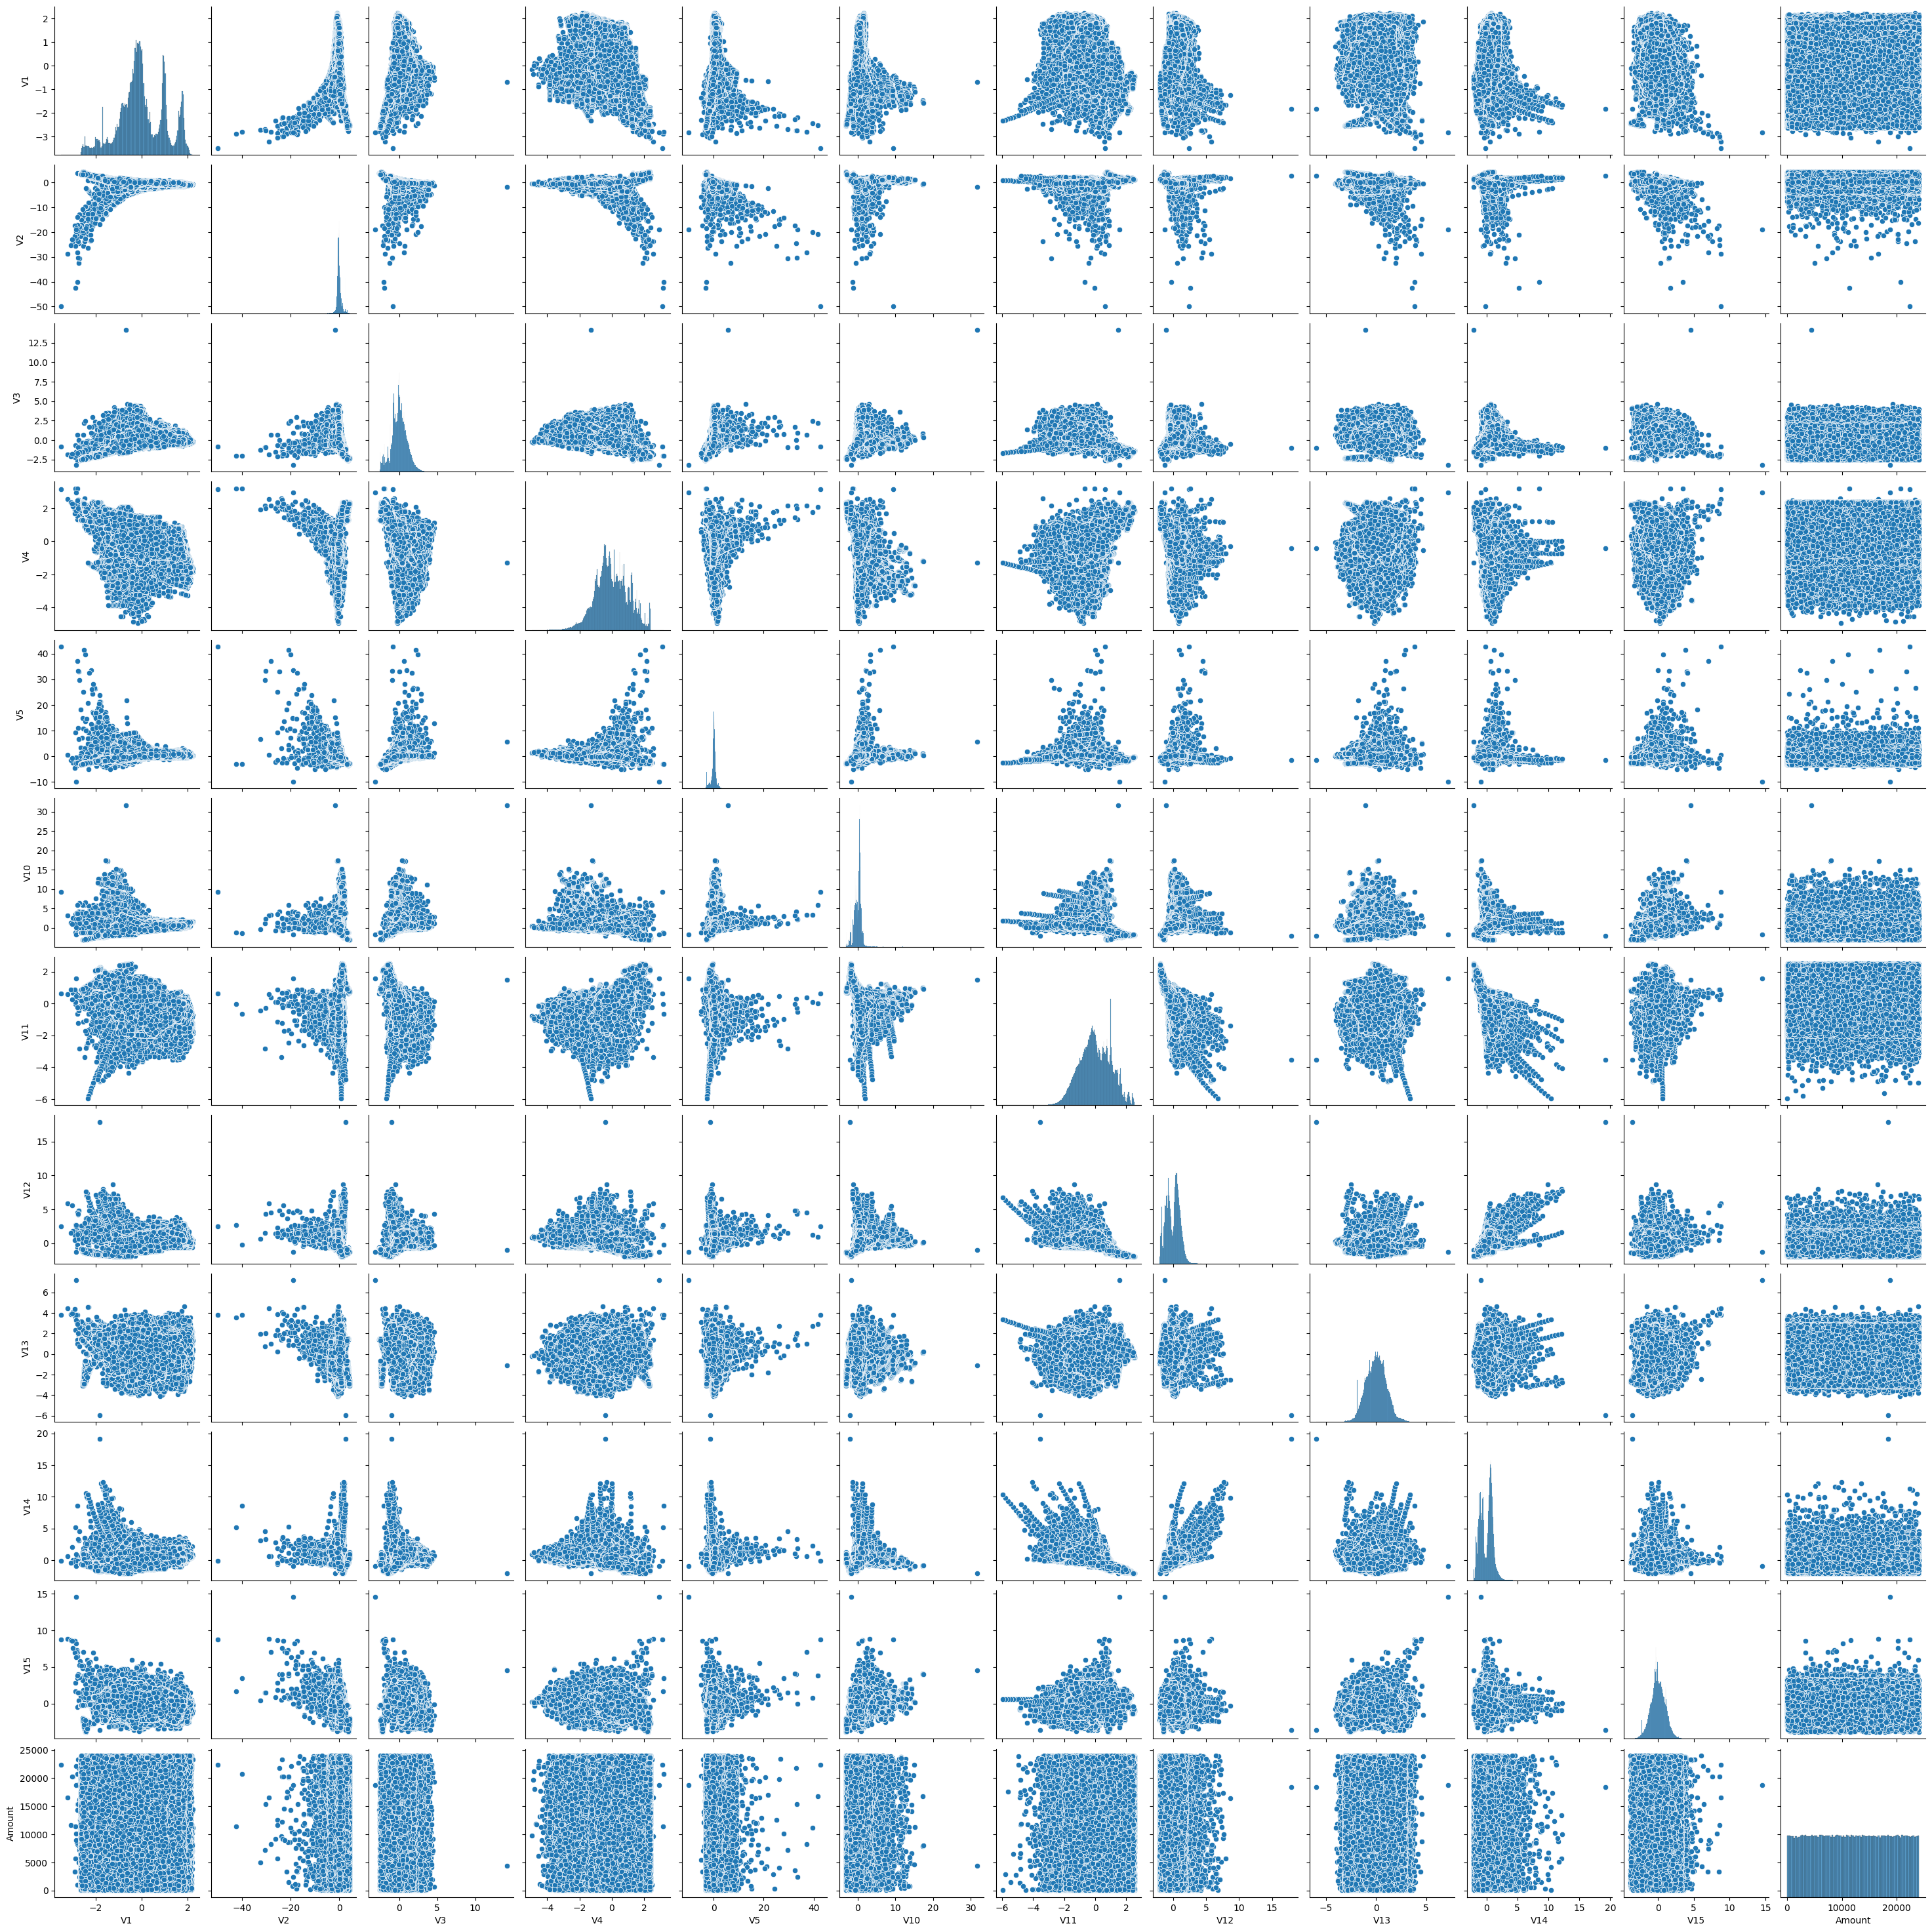

In [12]:
# Pairplot to visualize relationships
sns.pairplot(df[features])
plt.show()

#Finding correlations between attributes

##As can be seen above, the distribution for majority of them is not linear, so its best to use spearman's correlation.

In [13]:
correlation_matrix = df.corr(method='spearman')

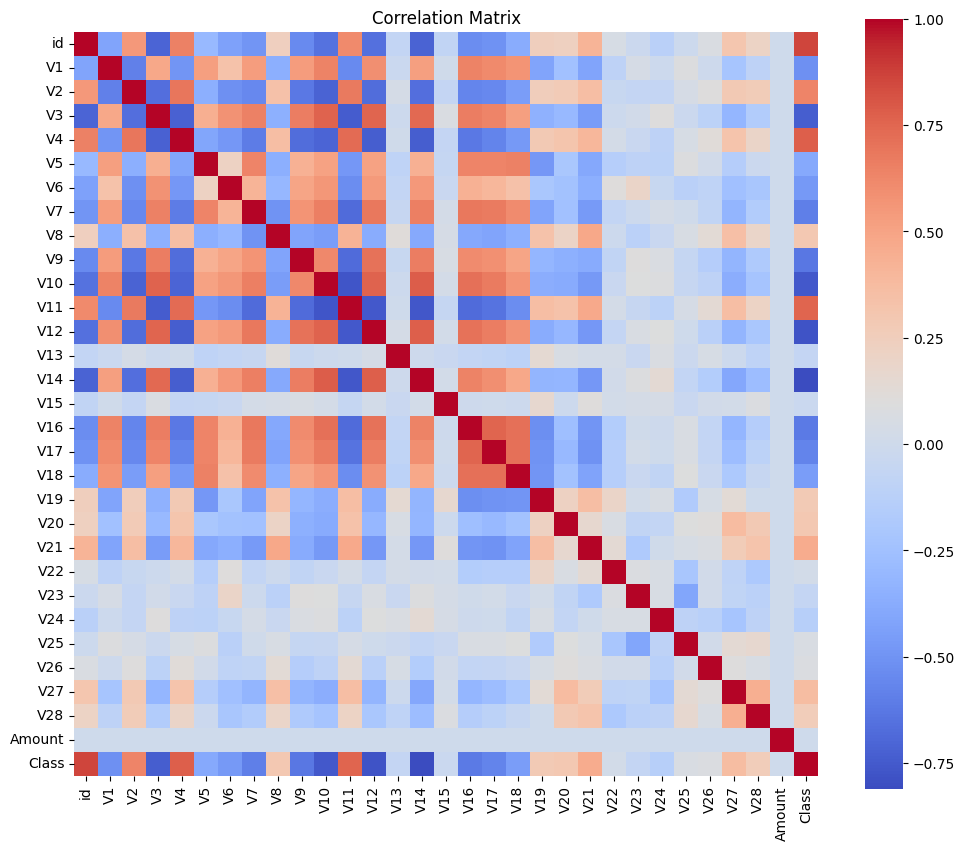

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## V10 has a high correlaiton with v3 (above 0.5)
v3 and v14(above 0.75)

Here are some observations on highly correlated features:

V14 and V12/V10/V16: These features show a strong positive correlation, as indicated by the dark red color. This suggests that they tend to increase or decrease together.
V2 and V5: These have a strong negative correlation (dark blue), meaning that when one increases, the other tends to decrease.
V4 and V6: There's a significant negative correlation here as well.
V14 and V16: These two features seem to be highly correlated, which could imply that they share similar properties or represent similar aspects of the dataset


#Splitting the dataset into training and test sets

In [15]:
X = df.drop('Class', axis=1)  # Input Features
y = df['Class']               # Target

In [16]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Standardizing the data

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #returns a numpy array
X_test_scaled = scaler.transform(X_test)


In [18]:
#visualizing the scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_df.shape


(454904, 30)

In [19]:
X_train_scaled_df.describe()

id            V1            V2            V3            V4  \
count  4.549040e+05  4.549040e+05  4.549040e+05  4.549040e+05  4.549040e+05   
mean  -2.945860e-17 -1.964948e-17 -1.686919e-17 -1.073068e-17 -1.065258e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.732628e+00 -3.495960e+00 -4.995538e+01 -3.184530e+00 -4.951663e+00   
25%   -8.656186e-01 -5.661092e-01 -4.865458e-01 -6.492462e-01 -6.569042e-01   
50%   -7.962767e-04 -9.310729e-02 -1.357420e-01  3.378567e-04 -7.427465e-02   
75%    8.667977e-01  8.324325e-01  3.436814e-01  6.284381e-01  7.081200e-01   
max    1.731206e+00  2.225260e+00  4.360973e+00  1.412887e+01  3.201798e+00   

                 V5            V6            V7            V8            V9  \
count  4.549040e+05  4.549040e+05  4.549040e+05  4.549040e+05  4.549040e+05   
mean   1.655680e-17  1.593201e-18 -1.266751e-17  3.795568e-18 -6.310326e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -9.949347e+00 -2.111760e+01 -4.316361e+00 -1.076043e+01 -3.753506e+00   
25%   -2.933163e-01 -4.462394e-01 -2.818187e-01 -1.923542e-01 -5.690208e-01   
50%    8.094199e-02  7.874924e-02  2.315255e-01 -1.146872e-01  9.345382e-02   
75%    4.400565e-01  4.981609e-01  5.215297e-01  4.658485e-02  5.599726e-01   
max    4.270267e+01  2.617685e+01  2.160606e+02  5.960381e+00  2.027853e+01   

       ...           V20           V21           V22           V23  \
count  ...  4.549040e+05  4.549040e+05  4.549040e+05  4.549040e+05   
mean   ...  4.311015e-18  2.514759e-18 -1.355783e-17 -1.499483e-18   
std    ...  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    ... -7.811402e+01 -1.939819e+01 -7.737309e+00 -3.035285e+01   
25%    ... -3.495806e-01 -1.664761e-01 -4.906566e-01 -2.385082e-01   
50%    ... -1.232684e-01 -3.742739e-02 -2.785267e-02 -6.013433e-02   
75%    ...  2.489111e-01  1.482638e-01  4.635576e-01  1.554231e-01   
max    ...  2.986088e+01  8.093887e+00  1.263568e+01  3.176681e+01   

                V24           V25           V26           V27           V28  \
count  4.549040e+05  4.549040e+05  4.549040e+05  4.549040e+05  4.549040e+05   
mean  -1.219892e-17 -8.661079e-18 -1.521351e-17 -6.154130e-18  5.060757e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.070351e+00 -1.361614e+01 -8.228577e+00 -1.046747e+01 -3.913670e+01   
25%   -6.518654e-01 -5.537833e-01 -6.319123e-01 -3.036185e-01 -2.335213e-01   
50%    1.641291e-02 -8.469578e-03 -1.208044e-02 -1.720672e-01 -1.486760e-02   
75%    7.016778e-01  5.499770e-01  6.733634e-01  3.332611e-01  4.108044e-01   
max    1.297101e+01  1.156164e+01  5.624632e+00  1.129014e+02  7.745336e+01   

             Amount  
count  4.549040e+05  
mean   2.379337e-16  
std    1.000001e+00  
min   -1.732556e+00  
25%   -8.656601e-01  
50%   -6.047579e-04  
75%    8.657982e-01  
max    1.733540e+00  

[8 rows x 30 columns]

#Based on the Architecture, our proposed model adds the Reconstruction Errors from the  Autoencoders and labels from the K-means clustering techniques back to the original dataset.

#Unsupervised Learning using Autoencoders
###Train the Autoencders on the normal data, unlike this dataset, usually the dataset in this domain is highly likely to be unbalanced with normal data significantly exceeding the fruadulent data, which is why compressing the normal data would be a better approach. Also, considering the fact that fraud is a rare occurence so the reconstruction error would be high for abnormal data.

In [20]:
X_train_Autoencoder = X_train_scaled_df[y_train == 0]
#models.Sequential is a model from Keras where each layer feeds as input to the next layer.

autoencoder = models.Sequential([
    layers.Input(shape=(X_train_Autoencoder.shape[1],)),
    layers.Dense(32, activation='relu'), #(ReLu - Rectified Linear Unit) #encoding/compression
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),  # Bottleneck layer (smallest representation)
    layers.Dense(16, activation='relu'), #Process of decoding starts
    layers.Dense(32, activation='relu'),
    layers.Dense(X_train_Autoencoder.shape[1], activation='sigmoid')  # Output layer
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder with normal data
history = autoencoder.fit(X_train_Autoencoder, X_train_Autoencoder,
                          epochs=50,
                          batch_size=256,
                          validation_split=0.1,
                          shuffle=True)



Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6268 - val_loss: 0.4891
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5166 - val_loss: 0.4761
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5187 - val_loss: 0.4616
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4634 - val_loss: 0.4489
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4685 - val_loss: 0.4456
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4528 - val_loss: 0.4435
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4630 - val_loss: 0.4416
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4621 - val_loss: 0.4406
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4468 - val_loss: 0.4394
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4607 - val_loss: 0.4378
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5032 - val_loss: 0.4372
Epoch 12/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

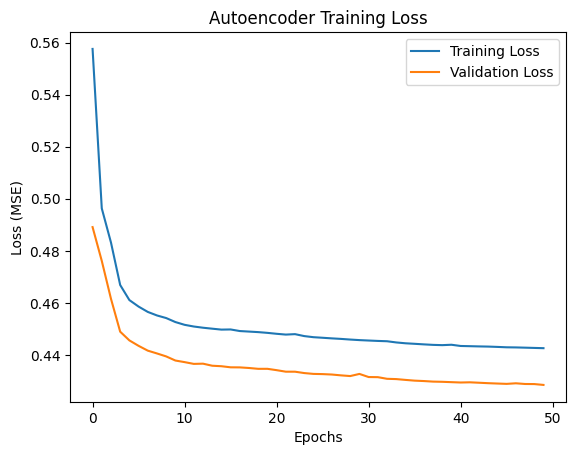

In [21]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

##Reconstruction Errors

In [22]:
X_train_reconstructions = autoencoder.predict(X_train_scaled_df)
mse_train = np.mean(np.power(X_train_scaled_df - X_train_reconstructions, 2), axis=1)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_reconstructions = autoencoder.predict(X_test_scaled_df)
mse_test = np.mean(np.power(X_test_scaled_df - X_test_reconstructions, 2), axis=1)



14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [23]:

print(mse_train[:5], y_train[:5])
print(mse_test[:5], y_test[:5])

225908    0.440481
154030    0.280491
465602    0.885141
276397    0.444668
203835    0.256645
dtype: float64 225908    0
154030    0
465602    1
276397    0
203835    0
Name: Class, dtype: int64
510747    0.376179
390373    0.381496
81077     0.175394
236854    0.446044
407198    1.293288
dtype: float64 510747    1
390373    1
81077     0
236854    0
407198    1
Name: Class, dtype: int64


**##How do I Identify Misclassifications? how to set a threshold value?**

#Adding reconstruction error as a a new feature to our dataset

In [24]:
X_train_scaled_df

id        V1        V2        V3        V4        V5        V6  \
225908 -0.356497 -0.449359  0.022698  0.037920 -1.324642  0.588570  0.372863   
154030 -0.794346  1.668580 -0.638618  0.544217 -0.456429 -0.034659  0.540762   
465602  1.103611  0.032322  0.406244 -0.724110  0.684640 -0.411775 -0.986649   
276397 -0.048941 -0.053868 -0.141452  0.251407 -1.177533  0.618193  0.978237   
203835 -0.490956  1.586753 -0.874189 -0.020836 -1.022085  0.080529  0.466920   
...          ...       ...       ...       ...       ...       ...       ...   
194456 -0.548089  1.403199 -0.796268  0.190496 -0.434894  0.032443  0.385155   
41904  -1.477367  0.878740 -0.453568  1.092663 -0.206051  0.014090  0.493627   
435008  0.917246 -1.331533  1.220038 -1.537219  1.731503 -1.666499 -1.750618   
425933  0.861966 -2.598078  3.292458 -2.484161  1.278913 -3.233355 -2.870940   
399135  0.698724 -0.576884 -0.172607  0.928047  0.312382  0.285554  0.601421   

              V7        V8        V9  ...       V20       V21       V22  \
225908  0.636246 -0.091875  1.419651  ...  0.045749 -0.359143 -0.772060   
154030  0.104395 -0.113459  2.512944  ... -0.403953 -0.137031  0.039450   
465602 -0.571462  0.173308  0.030681  ...  0.381534  0.174227 -0.135215   
276397  0.510163  0.066254  0.485411  ... -0.350320 -0.174592 -0.397942   
203835  0.176940 -0.138521  0.349567  ...  0.225556  0.036702  0.679887   
...          ...       ...       ...  ...       ...       ...       ...   
194456  0.300868 -0.149327  1.463207  ... -0.038758  0.017190  0.521931   
41904   0.275575 -0.089515  0.624485  ... -0.342034 -0.088961 -0.016477   
435008 -1.546465  1.319999 -1.521423  ... -0.628988  0.751137  0.119424   
425933 -2.421640  5.759513 -1.062387  ...  1.493266  0.574605 -1.864188   
399135  0.941772 -0.586034  0.520601  ... -1.085893  0.096483  0.315259   

             V23       V24       V25       V26       V27       V28    Amount  
225908  0.289799 -2.352699 -0.089708  0.505295  0.388024  0.067074 -0.971002  
154030  0.272799 -0.759713 -1.098733  0.969578 -0.287734 -0.243258  0.892512  
465602  0.478387  0.190510 -2.113312  0.703795  0.525993  0.426120  1.598443  
276397  0.131723 -2.609150 -1.064688  0.593182  0.083987  0.047752  0.449124  
203835 -0.066060  0.447731 -0.348304 -0.287551 -0.238092 -0.086242 -1.471545  
...          ...       ...       ...       ...       ...       ...       ...  
194456 -0.001650  1.297495 -0.419671 -0.670782 -0.243213 -0.106238 -1.714655  
41904   0.072504  0.364345  0.164586 -1.267076 -0.176131 -0.036247  0.866575  
435008 -0.379827  1.212665 -0.400348  0.324227 -0.382642 -0.456375 -0.859009  
425933 -1.342088  0.383714  3.701057 -0.485352  1.523222  0.787013 -0.638273  
399135  0.152788  0.937153 -0.826898  0.293468 -2.199015  0.849551 -0.340405  

[454904 rows x 30 columns]

In [25]:
X_test_scaled_df

id        V1        V2        V3        V4        V5        V6  \
510747  1.378615  0.701127 -0.062662  0.405712  0.374317  0.425763  0.477149   
390373  0.645350 -0.018175 -0.787274 -0.176100  0.342853  0.444631  0.398103   
81077  -1.238743 -0.461266  0.162050  1.239276 -0.459874 -0.089480  0.887929   
236854 -0.289819 -0.742053 -1.690798  1.687378 -0.280687  0.312055 -0.186850   
407198  0.747840 -1.535485  1.560556 -1.533242  0.766769 -1.556568 -1.825432   
...          ...       ...       ...       ...       ...       ...       ...   
260738 -0.144328  1.517016 -0.637715  0.300651 -0.141120  0.055011  0.490470   
326576  0.256727 -0.493843  0.713896 -1.105842  0.714647 -0.997581 -2.315200   
498586  1.304535 -2.124848  2.177343 -1.926031  1.555709 -2.431577 -0.552080   
443122  0.966673  0.902927 -0.074329  0.016038  0.121505  0.620888 -0.003243   
324570  0.244508 -1.859650  1.708481 -1.784204  1.615342 -2.236352 -1.729021   

              V7        V8        V9  ...       V20       V21       V22  \
510747  0.342840 -0.405831  1.293342  ... -0.521629  0.115533 -1.063343   
390373  1.008067 -0.155677  0.029162  ...  1.017653  0.092942  0.450180   
81077   0.166974  0.039939  1.240881  ...  0.299080  0.048022  0.984045   
236854  0.217994  0.046120  0.981489  ...  1.173605 -0.002908 -0.597909   
407198 -1.198817  1.933164 -0.600962  ...  0.683246  0.258828 -0.884364   
...          ...       ...       ...  ...       ...       ...       ...   
260738  0.246719 -0.108831  1.098067  ... -0.342775  0.011433  0.653033   
326576 -1.261224  0.324270 -1.126493  ...  1.451128  0.608603 -0.045518   
498586 -2.599833 -0.352511 -2.590001  ...  0.899216 -1.408938  0.688061   
443122  0.515095 -0.135022  0.417607  ... -0.224972 -0.234022 -0.623938   
324570 -1.954845  2.770297 -1.831910  ... -0.677948  0.836064 -0.284425   

             V23       V24       V25       V26       V27       V28    Amount  
510747  0.097780 -0.499227  0.465167 -0.360273 -0.257155 -0.026996 -1.442634  
390373  1.295696  0.939722 -0.982391 -0.756687 -0.206475  0.223520 -1.311825  
81077  -0.063568 -0.555943 -0.300644 -0.518683 -0.399084  0.603882  0.703298  
236854  0.484454  0.813726  0.602642  0.495856 -0.105110 -1.000135 -0.867493  
407198 -0.289826 -0.017664  0.971993 -0.619244  1.248688  0.416395  0.653657  
...          ...       ...       ...       ...       ...       ...       ...  
260738  0.019079 -0.761005 -0.353508 -1.397789 -0.199910 -0.183412 -1.454570  
326576 -0.359227  0.695690  1.975646 -1.219648  3.339715  2.574382  0.585206  
498586  0.224233  1.009847 -0.512788  0.018100 -2.975946 -2.251486 -0.493936  
443122 -0.146798 -0.332125  0.951000 -0.803847 -0.123863  0.179429  0.066861  
324570 -0.933496  1.090643  0.332016 -0.011833 -1.121694 -1.429374  0.527118  

[113726 rows x 30 columns]

In [26]:
X_train_scaled_df['Reconstruction_Error'] = mse_train
X_test_scaled_df['Reconstruction_Error'] = mse_test

###can we manipulate test_data at this point?

#Unsupervised Learning using K-means


In [ ]:
# prompt: DO you think It is appropriate to alter test data at this stage, please check my notebook to answer

No, it is generally inappropriate to alter test data at this stage.  The test set is crucial for evaluating the performance of your model on unseen data.  Modifying it would invalidate this evaluation and create an overly optimistic view of the model's true capabilities.  You've already created a hold-out test set (`X_test_scaled_df`) to evaluate your model. Any changes made to it would lead to biased results, so you shouldn't change `X_test_scaled_df` or `y_test`.

The reconstruction error is a valuable feature derived from the autoencoder.  You have correctly added it as a new feature to both your training and test sets (`X_train_scaled_df`, `X_test_scaled_df`).  Now you can proceed with your K-Means clustering using `X_train_scaled_df` and use the fitted K-Means model to create clusters for your test set `X_test_scaled_df` which would be an unseen dataset for the clustering model.  Then proceed with your combined model evaluation.


Avoid any changes to the original `X_test` or `y_test` data.


##To apply k-means we're assuming that we know no class and let k-means decide on how it clusters the data and what k vlaue it prefers using the elbow method

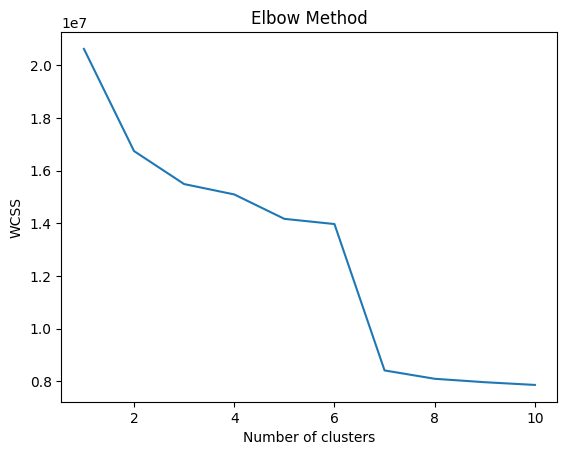

In [29]:
# prompt: Use elbow method to generate k value

# Use the elbow method to find the optimal k value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Instantiate KMeans with a chosen number of clusters (tunable parameter)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans on the training set with reconstruction errors
kmeans.fit(X_train_scaled_df)

# Generate cluster labels for the training and test sets
train_cluster_labels = kmeans.predict(X_train_scaled_df)
test_cluster_labels = kmeans.predict(X_test_scaled_df)

# Check the first few cluster labels (optional)
print(f"Cluster labels for training set: {train_cluster_labels[:5]}")
print(f"Cluster labels for test set: {test_cluster_labels[:5]}")


Cluster labels for training set: [1 1 0 1 1]
Cluster labels for test set: [1 1 1 1 0]


###It doesnt make sense to me to alter the test data too! we should be enriching the training data so that chances of false positives are reduced, adding labels to test data might improve the model's performance but won't be able to generalize well on new test data.

#Adding the k-means labels to the training data

In [30]:
X_train_scaled_df['K-means_labels'] = train_cluster_labels

In [32]:
X_train_scaled_df

id        V1        V2        V3        V4        V5        V6  \
225908 -0.356497 -0.449359  0.022698  0.037920 -1.324642  0.588570  0.372863   
154030 -0.794346  1.668580 -0.638618  0.544217 -0.456429 -0.034659  0.540762   
465602  1.103611  0.032322  0.406244 -0.724110  0.684640 -0.411775 -0.986649   
276397 -0.048941 -0.053868 -0.141452  0.251407 -1.177533  0.618193  0.978237   
203835 -0.490956  1.586753 -0.874189 -0.020836 -1.022085  0.080529  0.466920   
...          ...       ...       ...       ...       ...       ...       ...   
194456 -0.548089  1.403199 -0.796268  0.190496 -0.434894  0.032443  0.385155   
41904  -1.477367  0.878740 -0.453568  1.092663 -0.206051  0.014090  0.493627   
435008  0.917246 -1.331533  1.220038 -1.537219  1.731503 -1.666499 -1.750618   
425933  0.861966 -2.598078  3.292458 -2.484161  1.278913 -3.233355 -2.870940   
399135  0.698724 -0.576884 -0.172607  0.928047  0.312382  0.285554  0.601421   

              V7        V8        V9  ...       V22       V23       V24  \
225908  0.636246 -0.091875  1.419651  ... -0.772060  0.289799 -2.352699   
154030  0.104395 -0.113459  2.512944  ...  0.039450  0.272799 -0.759713   
465602 -0.571462  0.173308  0.030681  ... -0.135215  0.478387  0.190510   
276397  0.510163  0.066254  0.485411  ... -0.397942  0.131723 -2.609150   
203835  0.176940 -0.138521  0.349567  ...  0.679887 -0.066060  0.447731   
...          ...       ...       ...  ...       ...       ...       ...   
194456  0.300868 -0.149327  1.463207  ...  0.521931 -0.001650  1.297495   
41904   0.275575 -0.089515  0.624485  ... -0.016477  0.072504  0.364345   
435008 -1.546465  1.319999 -1.521423  ...  0.119424 -0.379827  1.212665   
425933 -2.421640  5.759513 -1.062387  ... -1.864188 -1.342088  0.383714   
399135  0.941772 -0.586034  0.520601  ...  0.315259  0.152788  0.937153   

             V25       V26       V27       V28    Amount  \
225908 -0.089708  0.505295  0.388024  0.067074 -0.971002   
154030 -1.098733  0.969578 -0.287734 -0.243258  0.892512   
465602 -2.113312  0.703795  0.525993  0.426120  1.598443   
276397 -1.064688  0.593182  0.083987  0.047752  0.449124   
203835 -0.348304 -0.287551 -0.238092 -0.086242 -1.471545   
...          ...       ...       ...       ...       ...   
194456 -0.419671 -0.670782 -0.243213 -0.106238 -1.714655   
41904   0.164586 -1.267076 -0.176131 -0.036247  0.866575   
435008 -0.400348  0.324227 -0.382642 -0.456375 -0.859009   
425933  3.701057 -0.485352  1.523222  0.787013 -0.638273   
399135 -0.826898  0.293468 -2.199015  0.849551 -0.340405   

        Reconstruction_Error  K-means_labels  
225908              0.440481               1  
154030              0.280491               1  
465602              0.885141               0  
276397              0.444668               1  
203835              0.256645               1  
...                      ...             ...  
194456              0.267441               1  
41904               0.206061               1  
435008              2.842752               0  
425933              4.252815               0  
399135              0.411194               1  

[454904 rows x 32 columns]

In [35]:
# prompt: Now I want to compare the k-means labels and reconstruction errors that are added as new features to the training data with the original labels

# Compare k-means labels and reconstruction errors with original labels

# Assuming y_train and y_test are your original labels
print("Comparison of K-means labels with original labels (Training Data):")
comparison_train = pd.DataFrame({'Original_Label': y_train, 'KMeans_Label': train_cluster_labels})
print(comparison_train.head(20))

print("\nComparison of Reconstruction Errors with Original Labels (Training Data):")
comparison_error_train = pd.DataFrame({'Original_Label': y_train, 'Reconstruction_Error': X_train_scaled_df['Reconstruction_Error']})
print(comparison_error_train.head(20))


Comparison of K-means labels with original labels (Training Data):
        Original_Label  KMeans_Label
225908               0             1
154030               0             1
465602               1             0
276397               0             1
203835               0             1
300313               1             1
350429               1             0
56158                0             1
94280                0             1
247040               0             1
1765                 0             1
220630               0             1
287743               1             0
183708               0             1
96132                0             1
548390               1             0
257574               0             1
467160               1             1
304277               1             0
23150                0             1

Comparison of Reconstruction Errors with Original Labels (Training Data):
        Original_Label  Reconstruction_Error
225908               0              

NameError: name 'confusion_matrix' is not defined

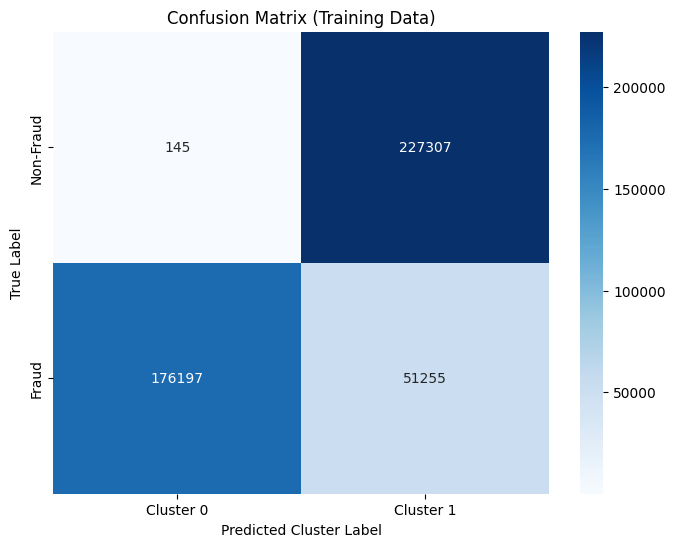

In [37]:
# You can further analyze these comparisons using metrics like:
# - Confusion matrices: to visualize the agreement between k-means labels and original labels
# - Cross-tabulation: to see the distribution of original labels within each k-means cluster


cm_train = confusion_matrix(y_train, train_cluster_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted Cluster Label")
plt.ylabel("True Label")
plt.show()

##Too many misclassified labels!!

##K-means labels are completely the opposite of the orginial dataset, however, the reconstruction errors seems to work correctly, based on the data visualization, i am setting the threshold value to be > 0.6

#Supervised Learning using a Deep learning model ()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.0667 - val_accuracy: 0.9990 - val_loss: 0.0037
Epoch 2/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 3/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 4/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 5/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 6/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 7/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 8/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9997 - loss: 0.0013 - 

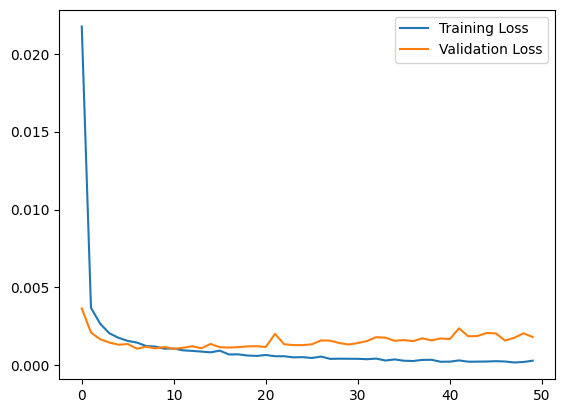

In [39]:
# Define the deep learning model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled_df.shape[1],)),  # Input size is number of features
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled_df,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [40]:
X_test_scaled_df.drop('Reconstruction_Error', axis=1, inplace=True)

In [41]:
X_test_scaled_df

id        V1        V2        V3        V4        V5        V6  \
510747  1.378615  0.701127 -0.062662  0.405712  0.374317  0.425763  0.477149   
390373  0.645350 -0.018175 -0.787274 -0.176100  0.342853  0.444631  0.398103   
81077  -1.238743 -0.461266  0.162050  1.239276 -0.459874 -0.089480  0.887929   
236854 -0.289819 -0.742053 -1.690798  1.687378 -0.280687  0.312055 -0.186850   
407198  0.747840 -1.535485  1.560556 -1.533242  0.766769 -1.556568 -1.825432   
...          ...       ...       ...       ...       ...       ...       ...   
260738 -0.144328  1.517016 -0.637715  0.300651 -0.141120  0.055011  0.490470   
326576  0.256727 -0.493843  0.713896 -1.105842  0.714647 -0.997581 -2.315200   
498586  1.304535 -2.124848  2.177343 -1.926031  1.555709 -2.431577 -0.552080   
443122  0.966673  0.902927 -0.074329  0.016038  0.121505  0.620888 -0.003243   
324570  0.244508 -1.859650  1.708481 -1.784204  1.615342 -2.236352 -1.729021   

              V7        V8        V9  ...       V20       V21       V22  \
510747  0.342840 -0.405831  1.293342  ... -0.521629  0.115533 -1.063343   
390373  1.008067 -0.155677  0.029162  ...  1.017653  0.092942  0.450180   
81077   0.166974  0.039939  1.240881  ...  0.299080  0.048022  0.984045   
236854  0.217994  0.046120  0.981489  ...  1.173605 -0.002908 -0.597909   
407198 -1.198817  1.933164 -0.600962  ...  0.683246  0.258828 -0.884364   
...          ...       ...       ...  ...       ...       ...       ...   
260738  0.246719 -0.108831  1.098067  ... -0.342775  0.011433  0.653033   
326576 -1.261224  0.324270 -1.126493  ...  1.451128  0.608603 -0.045518   
498586 -2.599833 -0.352511 -2.590001  ...  0.899216 -1.408938  0.688061   
443122  0.515095 -0.135022  0.417607  ... -0.224972 -0.234022 -0.623938   
324570 -1.954845  2.770297 -1.831910  ... -0.677948  0.836064 -0.284425   

             V23       V24       V25       V26       V27       V28    Amount  
510747  0.097780 -0.499227  0.465167 -0.360273 -0.257155 -0.026996 -1.442634  
390373  1.295696  0.939722 -0.982391 -0.756687 -0.206475  0.223520 -1.311825  
81077  -0.063568 -0.555943 -0.300644 -0.518683 -0.399084  0.603882  0.703298  
236854  0.484454  0.813726  0.602642  0.495856 -0.105110 -1.000135 -0.867493  
407198 -0.289826 -0.017664  0.971993 -0.619244  1.248688  0.416395  0.653657  
...          ...       ...       ...       ...       ...       ...       ...  
260738  0.019079 -0.761005 -0.353508 -1.397789 -0.199910 -0.183412 -1.454570  
326576 -0.359227  0.695690  1.975646 -1.219648  3.339715  2.574382  0.585206  
498586  0.224233  1.009847 -0.512788  0.018100 -2.975946 -2.251486 -0.493936  
443122 -0.146798 -0.332125  0.951000 -0.803847 -0.123863  0.179429  0.066861  
324570 -0.933496  1.090643  0.332016 -0.011833 -1.121694 -1.429374  0.527118  

[113726 rows x 30 columns]

In [44]:
X_test_scaled_df['Reconstruction_Error'] = mse_test
X_test_scaled_df['K-means_labels'] = test_cluster_labels

In [45]:
# 13. Make predictions

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled_df)

# Convert predicted probabilities to binary labels (0 or 1)
y_test_pred_labels = (y_test_pred > 0.5).astype(int)

# Check predictions (optional)
print(f"First 5 predictions: {y_test_pred_labels[:5]}")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
First 5 predictions: [[1]
 [1]
 [0]
 [0]
 [1]]


In [46]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC Score: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56837    26]
 [   20 56843]]
ROC-AUC Score: 0.9999765036859246


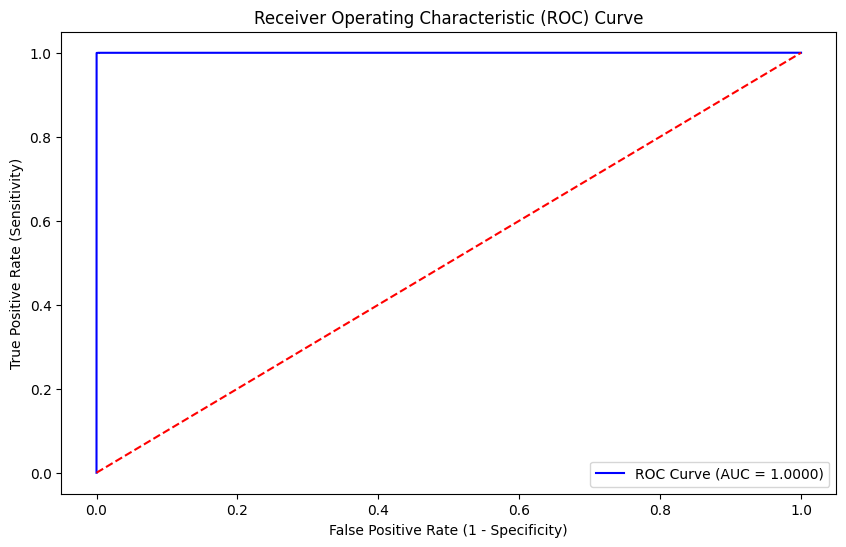

In [49]:
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

#Evaluating the model using classfication metrics

In [50]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [51]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 1.0000


Confusion Matrix:
[[56837    26]
 [   20 56843]]


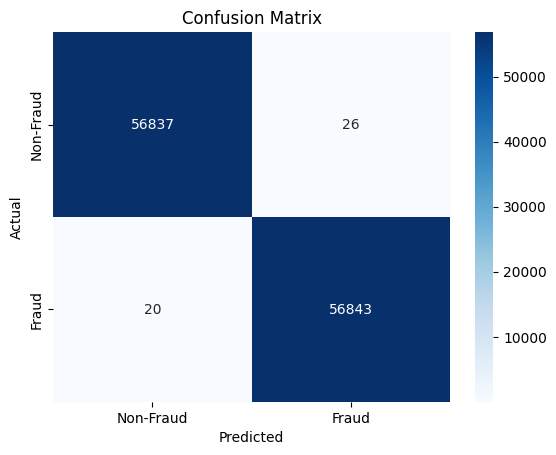

In [52]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# You can visualize the confusion matrix using seaborn for clarity
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# prompt: Calcualte the false positive rate

# Assuming 'conf_matrix' is the confusion matrix from your code:
# conf_matrix = confusion_matrix(y_test, y_test_pred_labels)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate false positive rate (FPR)
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # Handle cases with zero true negatives and false positives

print(f"False Positive Rate (FPR): {fpr}")

False Positive Rate (FPR): 0.0004572393296167983
